<a href="https://colab.research.google.com/github/vidjaydas/Data_Science_Python/blob/main/Forecasting_Data_Driven_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt  #Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

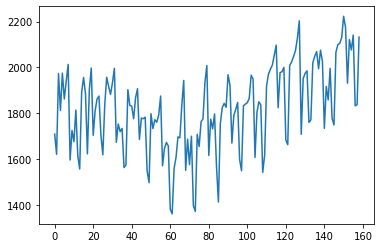

In [2]:
Walmart = pd.read_csv('footfalls.csv')
Walmart.Footfalls.plot()

#Splitting Data

In [3]:
Train = Walmart.head(147)
Test = Walmart.tail(12)

#Moving Average

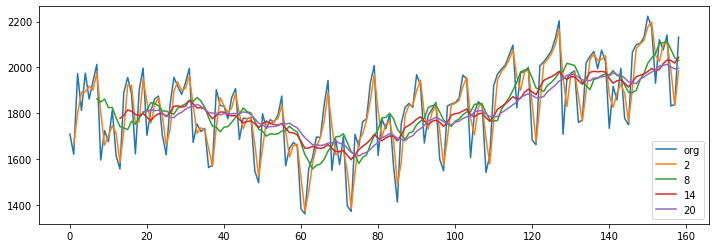

In [4]:
plt.figure(figsize=(12,4))
Walmart.Footfalls.plot(label='org')
for i in range(2,24,6):
    Walmart['Footfalls'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

#Time series decomposition plot

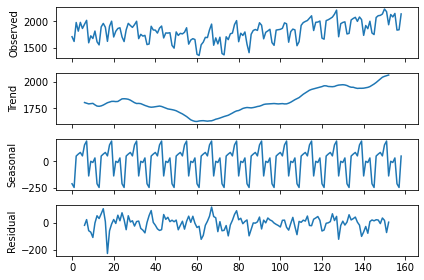

In [6]:
decompose_ts_add = seasonal_decompose(Walmart.Footfalls, freq=12)
decompose_ts_add.plot()
plt.show()

#ACF plots and PACF plots

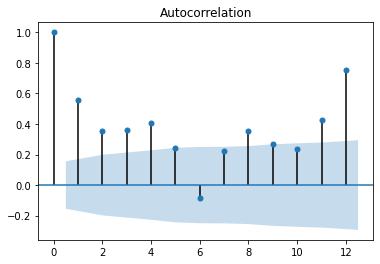

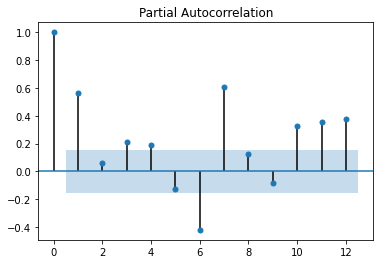

In [7]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(Walmart.Footfalls, lags=12)
tsa_plots.plot_pacf(Walmart.Footfalls, lags=12)
plt.show()

#Evaluation Metric MAPE

In [8]:
def MAPE(pred, org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

#Simple Exponential Method

In [9]:
ses_model = SimpleExpSmoothing(Train['Footfalls']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start=Test.index[0],end=Test.index[-1])
MAPE(pred_ses, Test.Footfalls)

8.490637057828362

8.49 is the error if we use the simple Exponential method

#Holt Method

In [11]:
#Holt method
hw_model = Holt(Train['Footfalls']).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start=Test.index[0], end= Test.index[-1])
MAPE(pred_hw, Test.Footfalls)

7.546249229496066

#Holts winter exponential smoothing with additive seasonality and additive trend

In [12]:
hwe_model_add_add = ExponentialSmoothing(Train['Footfalls'], seasonal='add', seasonal_periods=12).fit()  #add the trend to model
pred_hwe_add_add = hwe_model_add_add.predict(start=Test.index[0], end= Test.index[-1])
MAPE(pred_hwe_add_add, Test.Footfalls)

3.3917248544808216

#Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [13]:
hwe_model_mul_add = ExponentialSmoothing(Train['Footfalls'], seasonal='mul', trend='add', seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start=Test.index[0], end=Test.index[-1])
MAPE(pred_hwe_mul_add, Test.Footfalls)

3.118475269462364

#Final model by combining train and test

In [14]:
hwe_model_add_add = ExponentialSmoothing(Walmart['Footfalls'],seasonal='mul', trend='add', seasonal_periods=12).fit()

In [15]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

159    2156.789567
160    2188.299546
161    2147.097980
162    2263.990169
163    2305.817195
164    1932.061970
165    2098.495872
166    2084.574705
167    2136.439741
168    1857.566130
dtype: float64